<a href="https://colab.research.google.com/github/park-geun-hyeong/practice_pytorch/blob/main/Torch_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [4]:
model = nn.Linear(1,1) 

In [30]:
loss_fn = nn.L1Loss() ## L1 
optimizer = optim.SGD(model.parameters(), lr=0.001) ## SGD
epochs=100

In [58]:
num_data=100

x = init.uniform_(torch.Tensor(num_data,1),-10,10)
y = 2*x+3 

noise = init.normal_(torch.FloatTensor(num_data, 1),std=1)

y_noise = y+noise

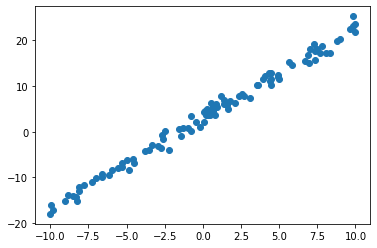

In [68]:
%matplotlib inline
plt.scatter(x,y_noise)

In [69]:
epochs=500
losses=[]

for i in tqdm(range(epochs)):

    optimizer.zero_grad()

    pred = model(x)
    loss = loss_fn(pred, y_noise) 
    loss.backward()
    optimizer.step()

    if (i+1) % 50 == 0:
        print('{}epoch data: '.format(i+1),loss.data)
        losses.append(loss.data)

100%|██████████| 500/500 [00:00<00:00, 2648.16it/s]

50epoch data:  tensor(1.4726)
100epoch data:  tensor(1.4433)
150epoch data:  tensor(1.4150)
200epoch data:  tensor(1.3889)
250epoch data:  tensor(1.3628)
300epoch data:  tensor(1.3367)
350epoch data:  tensor(1.3106)
400epoch data:  tensor(1.2858)
450epoch data:  tensor(1.2638)
500epoch data:  tensor(1.2422)


In [70]:
loss_list = np.array(losses)

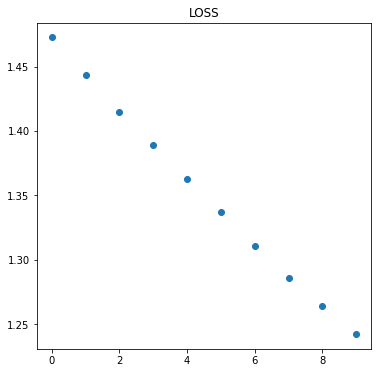

In [72]:
plt.figure(figsize=(6,6))
plt.title("LOSS")
plt.scatter(range(len(loss_list)), loss_list)
plt.show()


In [73]:
param_list = list(model.parameters())

In [74]:
print(param_list[0].item(), param_list[1].item())

1.984357237815857 1.9853354692459106


In [87]:
pred = np.array(pred.detach())

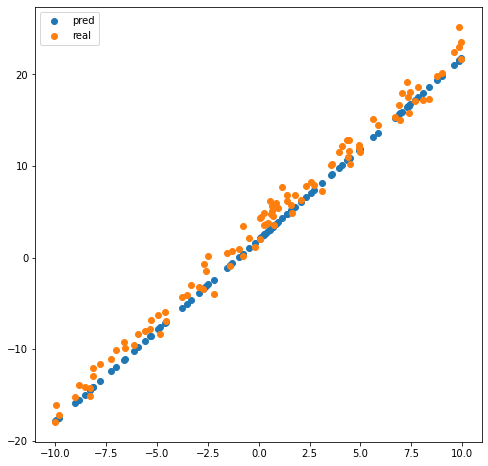

In [92]:
plt.figure(figsize=(8,8))
plt.scatter(x,pred)
plt.scatter(x,y_noise)
plt.legend(['pred','real'], loc='upper left')
plt.show()